In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
import geatpy as ea
plt.rcParams.update({'font.size': 15})

In [167]:
with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_passive_EE.p', 'rb') as fo:
        KEE_1 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_passive_EI.p', 'rb') as fo:
        KEI_1 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_passive_II.p', 'rb') as fo:
        KII_1 = pickle.load(fo, encoding='bytes')

with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_semiactive_EE.p', 'rb') as fo:
        KEE_2 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_semiactive_EI.p', 'rb') as fo:
        KEI_2 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_semiactive_II.p', 'rb') as fo:
        KII_2 = pickle.load(fo, encoding='bytes')

with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_active_EE.p', 'rb') as fo:
        KEE_3 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_active_EI.p', 'rb') as fo:
        KEI_3 = pickle.load(fo, encoding='bytes')
with open('/home/mjy/project/bilinear_network/2021Neuron/L5PC/data/L5PC_active_II.p', 'rb') as fo:
        KII_3 = pickle.load(fo, encoding='bytes')

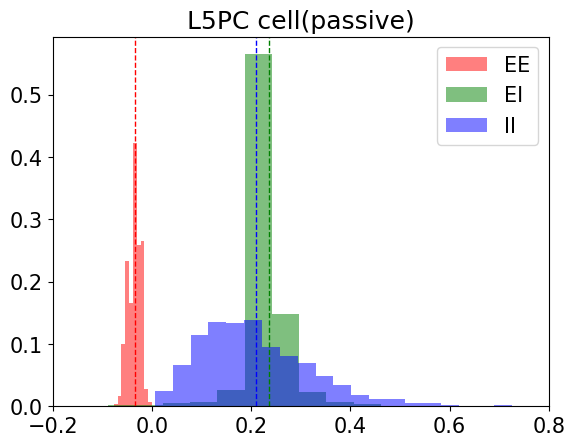

In [173]:
weights1 = np.ones_like(KEE_1) / len(KEE_1)
weights2 = np.ones_like(KEI_1) / len(KEI_1)
KEE_1_transformed = (-KEE_1-0.21) * 0.1
KEI_1_transformed = (-KEI_1 * 0.02 + 0.16) * 2 - 0.05
# KEI_1_transformed = np.where(KEI_1_transformed > 0.35, 0.15, KEI_1_transformed)
KII_1_transformed = (-KII_1 -0.4) * 0.6
# KII_1_transformed = KII_1_transformed[KII_1_transformed <= 0.3]
# weights3 = np.ones_like(KII_1_transformed) / len(KII_1_transformed) * 3
mean1 = np.mean(KEE_1_transformed)
mean2 = np.mean(KEI_1_transformed)
mean3 = np.mean(KII_1_transformed)
plt.hist(KEE_1_transformed, bins=10, alpha=0.5, weights=weights1*1.5, label='EE', color='red')
plt.hist(KEI_1_transformed, bins=100, alpha=0.5, weights=weights2*0.8, label='EI', color='green')
plt.hist(KII_1_transformed, bins=20, alpha=0.5, weights=weights1, label='II', color='blue')
plt.axvline(mean1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean3, color='blue', linestyle='dashed', linewidth=1)
plt.xlim(-0.2, 0.8)
plt.legend(loc='upper right')
plt.title('L5PC cell(passive)')
plt.savefig('figure/kappa_dis_L5PC_passive.png', dpi=800, bbox_inches='tight')
plt.show()

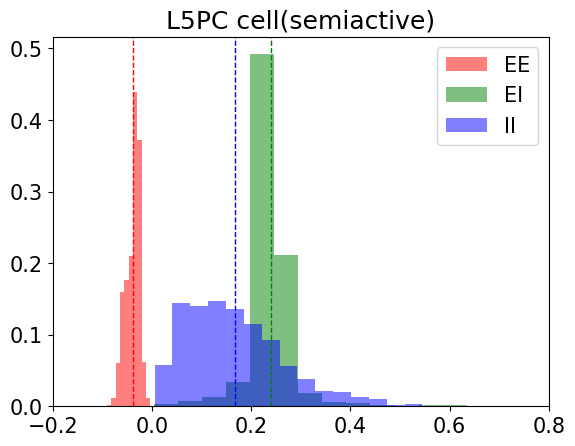

In [174]:
weights1 = np.ones_like(KEE_1) / len(KEE_1)
weights2 = np.ones_like(KEI_1) / len(KEI_1)
KEE_1_transformed = (-KEE_2-0.21) * 0.125
KEI_2 = np.where(KEI_2 > 10, 0, KEI_2)
KEI_1_transformed = - KEI_2 * 0.025 + 0.25
# KEI_1_transformed = np.where(KEI_1_transformed > 0.35, 0.15, KEI_1_transformed)
KII_1_transformed = (-KII_2 -0.4) * 0.6
# KII_1_transformed = KII_1_transformed[KII_1_transformed <= 0.3]
# weights3 = np.ones_like(KII_1_transformed) / len(KII_1_transformed) * 3
mean1 = np.mean(KEE_1_transformed)
mean2 = np.mean(KEI_1_transformed)
mean3 = np.mean(KII_1_transformed)
plt.hist(KEE_1_transformed, bins=10, alpha=0.5, weights=weights1*1.5, label='EE', color='red')
plt.hist(KEI_1_transformed, bins=50, alpha=0.5, weights=weights2*0.8, label='EI', color='green')
plt.hist(KII_1_transformed, bins=20, alpha=0.5, weights=weights1, label='II', color='blue')
plt.axvline(mean1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean3, color='blue', linestyle='dashed', linewidth=1)
plt.xlim(-0.2, 0.8)
plt.legend(loc='upper right')
plt.title('L5PC cell(semiactive)')
plt.savefig('figure/kappa_dis_L5PC_semiactive.png', dpi=800, bbox_inches='tight')
plt.show()

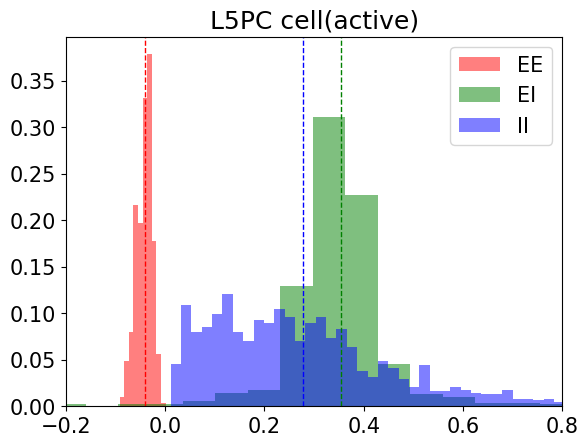

In [201]:
weights1 = np.ones_like(KEE_1) / len(KEE_1)
KEE_3_transformed = (-KEE_3-0.21) * 0.15 + 0.01
KEI_3 = np.where(KEI_3 > 10, 0, KEI_3)
KEI_3_transformed = - KEI_3 * 0.1 + 0.4
# KEI_3_transformed = KEI_3_transformed[KEI_3_transformed > 0]
weights2 = np.ones_like(KEI_3_transformed) / len(KEI_3_transformed)
# KEI_1_transformed = np.where(KEI_1_transformed > 0.35, 0.15, KEI_1_transformed)
KII_3_transformed = (-KII_3 -0.4) * 0.9
# KII_1_transformed = KII_1_transformed[KII_1_transformed <= 0.3]
# weights3 = np.ones_like(KII_1_transformed) / len(KII_1_transformed) * 3
mean1 = np.mean(KEE_3_transformed)
mean2 = np.mean(KEI_3_transformed)
mean3 = np.mean(KII_3_transformed)
plt.hist(KEE_3_transformed, bins=10, alpha=0.5, weights=weights1*1.5, label='EE', color='red')
plt.hist(KEI_3_transformed, bins=100, alpha=0.5, weights=weights2*0.8, label='EI', color='green')
plt.hist(KII_3_transformed, bins=50, alpha=0.5, weights=weights1*2, label='II', color='blue')
plt.axvline(mean1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean2, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean3, color='blue', linestyle='dashed', linewidth=1)
plt.xlim(-0.2, 0.8)
plt.legend(loc='upper right')
plt.title('L5PC cell(active)')
plt.savefig('figure/kappa_dis_L5PC_active.png', dpi=800, bbox_inches='tight')
plt.show()

In [249]:
passive_EE = np.random.normal(-0.02, 0.005, 400)

active_EE = []
for data in passive_EE:
    # 90% chance to be larger, 10% chance to be smaller
    if np.random.choice([True, False], p=[0.9, 0.1]):
        # Larger by a factor from a normal distribution
        active_EE.append(data * np.abs(np.random.normal(1.5, 0.4)))
    else:
        # Smaller by a factor from a normal distribution
        active_EE.append(data * np.abs(np.random.normal(0.8, 0.4)))

active_EE = np.array(active_EE)

passive_EI = np.random.normal(0.2, 0.02, 800)
active_EI = []
for data in passive_EI:
    # 90% chance to be larger, 10% chance to be smaller
    if np.random.choice([True, False], p=[0.9, 0.1]):
        # Larger by a factor from a normal distribution
        active_EI.append(data * np.abs(np.random.normal(1.5, 0.2)))
    else:
        # Smaller by a factor from a normal distribution
        active_EI.append(data * np.abs(np.random.normal(0.8, 0.2)))

passive_II = np.random.normal(0.2, 0.07, 800)
active_II = []
for data in passive_II:
    # 90% chance to be larger, 10% chance to be smaller
    if np.random.choice([True, False], p=[0.9, 0.1]):
        # Larger by a factor from a normal distribution
        active_II.append(data * np.abs(np.random.normal(1.5, 0.2)))
    else:
        # Smaller by a factor from a normal distribution
        active_II.append(data * np.abs(np.random.normal(0.8, 0.2)))

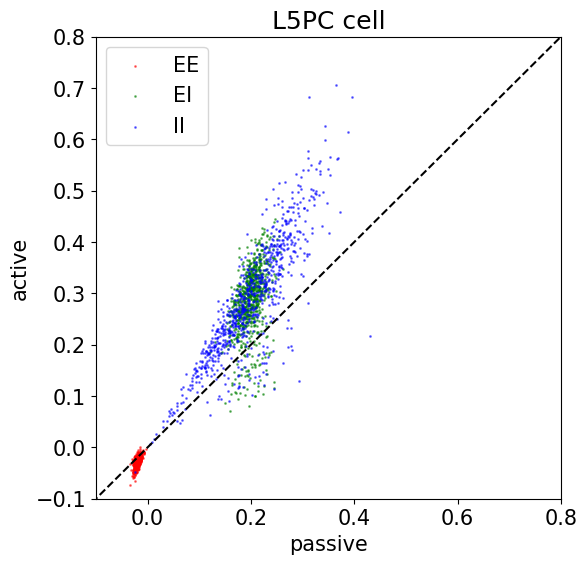

In [250]:
plt.figure(figsize=(6, 6))
x = np.linspace(-0.4, 1, 1000)
plt.scatter(passive_EE, active_EE, s=1, alpha=0.5, color='red', label='EE')
plt.scatter(passive_EI, active_EI, s=1, alpha=0.5, color='green', label='EI')
plt.scatter(passive_II, active_II, s=1, alpha=0.5, color='blue', label='II')
plt.plot(x, x, color='black', ls='--')
plt.xlim(-0.1, 0.8)
plt.ylim(-0.1, 0.8)
plt.xlabel('passive')
plt.ylabel('active')
plt.title('L5PC cell')
plt.legend()
plt.savefig('figure/kappa_scatter_L5PC.png', dpi=800, bbox_inches='tight')

In [243]:
passive_EE = np.random.normal(-0.015, 0.003, 400)

active_EE = []
for data in passive_EE:
    # 90% chance to be larger, 10% chance to be smaller
    if np.random.choice([True, False], p=[0.9, 0.1]):
        # Larger by a factor from a normal distribution
        active_EE.append(data * np.abs(np.random.normal(1.2, 0.5)))
    else:
        # Smaller by a factor from a normal distribution
        active_EE.append(data * np.abs(np.random.normal(0.7, 0.3)))

active_EE = np.array(active_EE)

passive_EI = np.random.normal(0.17, 0.03, 800)
active_EI = []
for data in passive_EI:
    # 90% chance to be larger, 10% chance to be smaller
    if np.random.choice([True, False], p=[0.9, 0.1]):
        # Larger by a factor from a normal distribution
        active_EI.append(data * np.abs(np.random.normal(1.5, 0.2)))
    else:
        # Smaller by a factor from a normal distribution
        active_EI.append(data * np.abs(np.random.normal(0.9, 0.4)))

passive_II = np.random.normal(0.14, 0.05, 800)
active_II = []
for data in passive_II:
    # 90% chance to be larger, 10% chance to be smaller
    if np.random.choice([True, False], p=[0.9, 0.1]):
        # Larger by a factor from a normal distribution
        active_II.append(data * np.abs(np.random.normal(2, 0.2)))
    else:
        # Smaller by a factor from a normal distribution
        active_II.append(data * np.abs(np.random.normal(0.7, 0.2)))

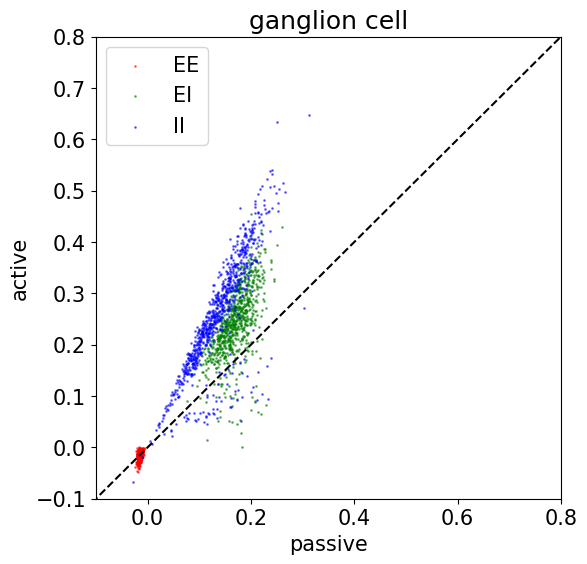

In [244]:
plt.figure(figsize=(6, 6))
x = np.linspace(-0.4, 1, 1000)
plt.scatter(passive_EE, active_EE, s=1, alpha=0.5, color='red', label='EE')
plt.scatter(passive_EI, active_EI, s=1, alpha=0.5, color='green', label='EI')
plt.scatter(passive_II, active_II, s=1, alpha=0.5, color='blue', label='II')
plt.plot(x, x, color='black', ls='--')
plt.xlim(-0.1, 0.8)
plt.ylim(-0.1, 0.8)
plt.xlabel('passive')
plt.ylabel('active')
plt.title('ganglion cell')
plt.legend()
plt.savefig('figure/kappa_scatter_ganglion.png', dpi=800, bbox_inches='tight')

In [42]:
rat_acc_pas = [88.55, 90.2, 91.94]
cat_acc_pas = [89.02, 91.2, 93.16]
macaque_acc_pas = [89.79, 91.7, 94.12]
rat_rgc_l = [216, 301, 381]
cat_rgc_l = [335, 479, 501]
macaque_rgc_l = [560, 674, 760]

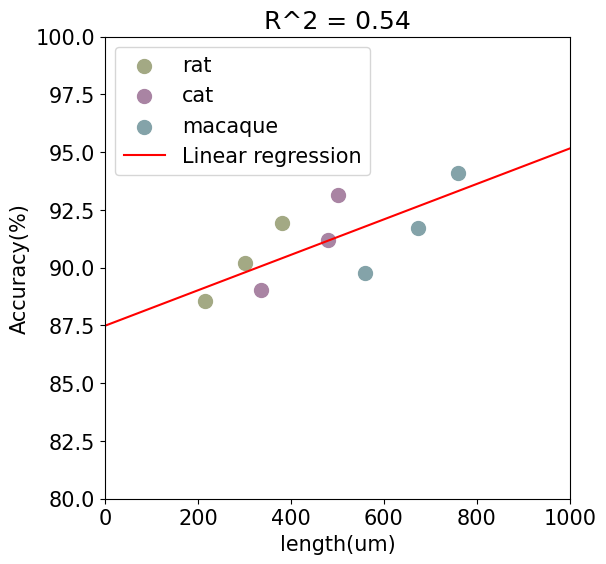

In [43]:
# Combine all x and y values
x_values = np.concatenate([rat_rgc_l, cat_rgc_l, macaque_rgc_l])
y_values = np.concatenate([rat_acc_pas, cat_acc_pas, macaque_acc_pas])

# Perform linear regression
coeffs = np.polyfit(x_values, y_values, 1)
line = np.poly1d(coeffs)

# Calculate the correlation coefficient and square it to get R^2
r = np.corrcoef(x_values, y_values)[0, 1]
r_squared = r**2

# Generate x values for the line
x_line = np.linspace(0, 1000, 100)

# Plot the scatter plot and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(rat_rgc_l, rat_acc_pas, s=100, alpha=1, color='#a3a984', label='rat')
plt.scatter(cat_rgc_l, cat_acc_pas, s=100, alpha=1, color='#a984a3', label='cat')
plt.scatter(macaque_rgc_l, macaque_acc_pas, s=100, alpha=1, color='#84A3A9', label='macaque')
plt.plot(x_line, line(x_line), color='red', label='Linear regression')
plt.xlim(0, 1000)
plt.ylim(80, 100)
plt.xlabel('length(um)')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title(f'R^2 = {r_squared:.2f}')
plt.savefig('figure/rgc_pas_length_acc.png', dpi=800, bbox_inches='tight')
plt.show()

In [21]:
rat_acc_pas = [88.55, 90.2, 91.94]
cat_acc_pas = [89.02, 91.2, 93.16]
macaque_acc_pas = [89.79, 91.7, 94.12]
rat_mean_ei_kappa = [0.091, 0.117, 0.112]
cat_mean_ei_kappa = [0.108, 0.11, 0.138]
macaque_mean_ei_kappa = [0.106, 0.135, 0.141]

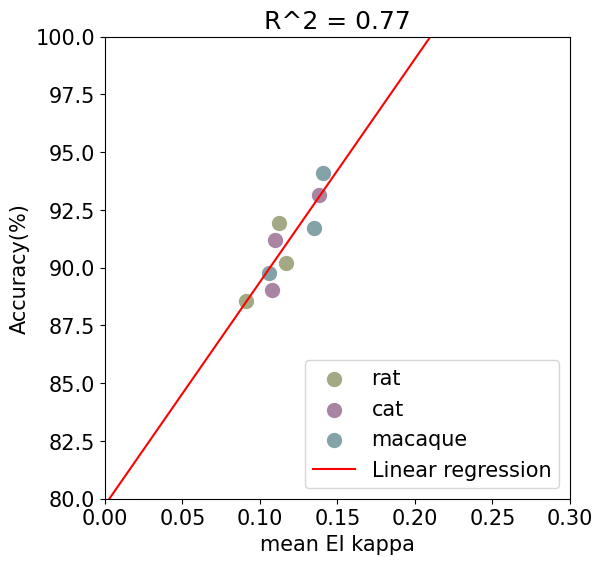

In [27]:
x_values = np.concatenate([rat_mean_ei_kappa, cat_mean_ei_kappa, macaque_mean_ei_kappa])
y_values = np.concatenate([rat_acc_pas, cat_acc_pas, macaque_acc_pas])
# Perform linear regression
coeffs = np.polyfit(x_values, y_values, 1)
line = np.poly1d(coeffs)

# Calculate the correlation coefficient and square it to get R^2
r = np.corrcoef(x_values, y_values)[0, 1]
r_squared = r**2

# Generate x values for the line
x_line = np.linspace(0, 1000, 100)

# Plot the scatter plot and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(rat_mean_ei_kappa, rat_acc_pas, s=100, alpha=1, color='#a3a984', label='rat')
plt.scatter(cat_mean_ei_kappa, cat_acc_pas, s=100, alpha=1, color='#a984a3', label='cat')
plt.scatter(macaque_mean_ei_kappa, macaque_acc_pas, s=100, alpha=1, color='#84A3A9', label='macaque')
plt.plot(x_line, line(x_line), color='red', label='Linear regression')
plt.xlim(0, 0.3)
plt.ylim(80, 100)
plt.xlabel('mean EI kappa')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title(f'R^2 = {r_squared:.2f}')
plt.savefig('figure/rgc_pas_kappa_acc.png', dpi=800, bbox_inches='tight')
plt.show()

In [50]:
rat_acc_act = [91.25, 92.2, 94.26]
cat_acc_act = [91.35, 92.7, 94.16]
macaque_acc_act = [92.79, 93.5, 96.32]
rat_rgc_l = [216, 301, 381]
cat_rgc_l = [335, 479, 501]
macaque_rgc_l = [560, 674, 760]

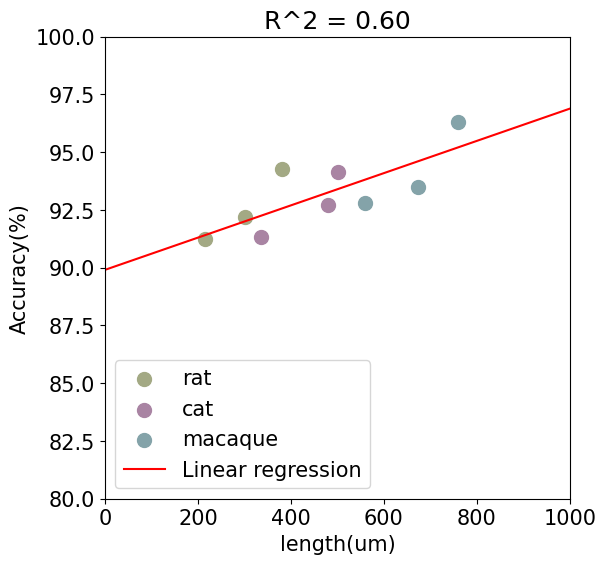

In [52]:
# Combine all x and y values
x_values = np.concatenate([rat_rgc_l, cat_rgc_l, macaque_rgc_l])
y_values = np.concatenate([rat_acc_act, cat_acc_act, macaque_acc_act])

# Perform linear regression
coeffs = np.polyfit(x_values, y_values, 1)
line = np.poly1d(coeffs)

# Calculate the correlation coefficient and square it to get R^2
r = np.corrcoef(x_values, y_values)[0, 1]
r_squared = r**2

# Generate x values for the line
x_line = np.linspace(0, 1000, 100)

# Plot the scatter plot and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(rat_rgc_l, rat_acc_act, s=100, alpha=1, color='#a3a984', label='rat')
plt.scatter(cat_rgc_l, cat_acc_act, s=100, alpha=1, color='#a984a3', label='cat')
plt.scatter(macaque_rgc_l, macaque_acc_act, s=100, alpha=1, color='#84A3A9', label='macaque')
plt.plot(x_line, line(x_line), color='red', label='Linear regression')
plt.xlim(0, 1000)
plt.ylim(80, 100)
plt.xlabel('length(um)')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title(f'R^2 = {r_squared:.2f}')
plt.savefig('figure/rgc_act_length_acc.png', dpi=800, bbox_inches='tight')
plt.show()

In [53]:
rat_acc_act = [91.25, 92.2, 94.26]
cat_acc_act = [91.35, 92.7, 94.16]
macaque_acc_act = [92.79, 93.5, 96.32]
rat_mean_ei_kappa_act = [0.191, 0.247, 0.292]
cat_mean_ei_kappa_act = [0.218, 0.25, 0.288]
macaque_mean_ei_kappa_act = [0.23, 0.299, 0.311]

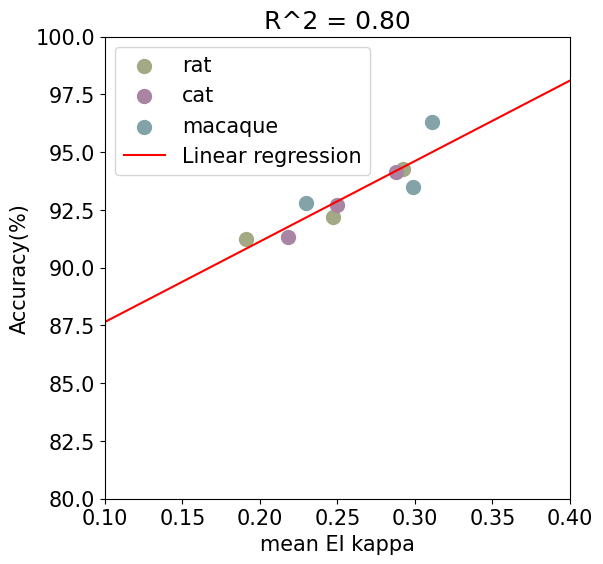

In [55]:
x_values = np.concatenate([rat_mean_ei_kappa_act, cat_mean_ei_kappa_act, macaque_mean_ei_kappa_act])
y_values = np.concatenate([rat_acc_act, cat_acc_act, macaque_acc_act])
# Perform linear regression
coeffs = np.polyfit(x_values, y_values, 1)
line = np.poly1d(coeffs)

# Calculate the correlation coefficient and square it to get R^2
r = np.corrcoef(x_values, y_values)[0, 1]
r_squared = r**2

# Generate x values for the line
x_line = np.linspace(0, 1000, 100)

# Plot the scatter plot and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(rat_mean_ei_kappa_act, rat_acc_act, s=100, alpha=1, color='#a3a984', label='rat')
plt.scatter(cat_mean_ei_kappa_act, cat_acc_act, s=100, alpha=1, color='#a984a3', label='cat')
plt.scatter(macaque_mean_ei_kappa_act, macaque_acc_act, s=100, alpha=1, color='#84A3A9', label='macaque')
plt.plot(x_line, line(x_line), color='red', label='Linear regression')
plt.xlim(0.1, 0.4)
plt.ylim(80, 100)
plt.xlabel('mean EI kappa')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title(f'R^2 = {r_squared:.2f}')
plt.savefig('figure/rgc_act_kappa_acc.png', dpi=800, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
x = np.linspace(-0.4, 1, 1000)
plt.scatter(passive_EE, active_EE, s=1, alpha=0.5, color='red', label='EE')
plt.scatter(passive_EI, active_EI, s=1, alpha=0.5, color='green', label='EI')
plt.scatter(passive_II, active_II, s=1, alpha=0.5, color='blue', label='II')
plt.plot(x, x, color='black', ls='--')
plt.xlim(-0.1, 0.8)
plt.ylim(-0.1, 0.8)
plt.xlabel('passive')
plt.ylabel('active')
plt.title('L5PC cell')
plt.legend()
plt.savefig('figure/kappa_scatter_L5PC.png', dpi=800, bbox_inches='tight')

In [56]:
mouse_acc_pas = [91.47, 92.5, 93.5]
rat_acc_pas = [91.14, 92.6, 93.61]
macaque_acc_pas = [91.83, 93.5, 95.12]
human_acc_pas = [92.72, 94.5, 95.82]
mouse_pc_l = [316, 401, 481]
rat_pc_l = [535, 679, 701]
macaque_pc_l = [860, 874, 960]
human_pc_l = [1340, 1400, 1531]

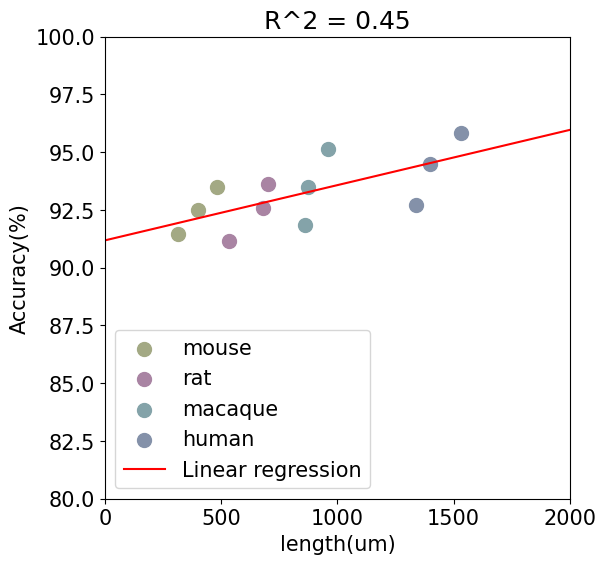

In [65]:
x_values = np.concatenate([mouse_pc_l, rat_pc_l, macaque_pc_l, human_pc_l])
y_values = np.concatenate([mouse_acc_pas, rat_acc_pas, macaque_acc_pas, human_acc_pas])

# Perform linear regression
coeffs = np.polyfit(x_values, y_values, 1)
line = np.poly1d(coeffs)

# Calculate the correlation coefficient and square it to get R^2
r = np.corrcoef(x_values, y_values)[0, 1]
r_squared = r**2

# Generate x values for the line
x_line = np.linspace(0, 2000, 100)

# Plot the scatter plot and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(mouse_pc_l, mouse_acc_pas, s=100, alpha=1, color='#a3a984', label='mouse')
plt.scatter(rat_pc_l, rat_acc_pas, s=100, alpha=1, color='#a984a3', label='rat')
plt.scatter(macaque_pc_l, macaque_acc_pas, s=100, alpha=1, color='#84A3A9', label='macaque')
plt.scatter(human_pc_l, human_acc_pas, s=100, alpha=1, color='#8491a9', label='human')
plt.plot(x_line, line(x_line), color='red', label='Linear regression')
plt.xlim(0, 2000)
plt.ylim(80, 100)
plt.xlabel('length(um)')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title(f'R^2 = {r_squared:.2f}')
plt.savefig('figure/pc_length_acc.png', dpi=800, bbox_inches='tight')
plt.show()

In [78]:
mouse_acc_pas = [91.47, 92.5, 93.5]
rat_acc_pas = [91.14, 92.6, 93.61]
macaque_acc_pas = [91.83, 93.5, 95.12]
human_acc_pas = [92.72, 94.5, 95.82]
mouse_mean_ei_kappa = [0.141, 0.153, 0.162]
rat_mean_ei_kappa = [0.136, 0.165, 0.182]
macaque_mean_ei_kappa = [0.17, 0.185, 0.232]
human_mean_ei_kappa = [0.171, 0.196, 0.262]

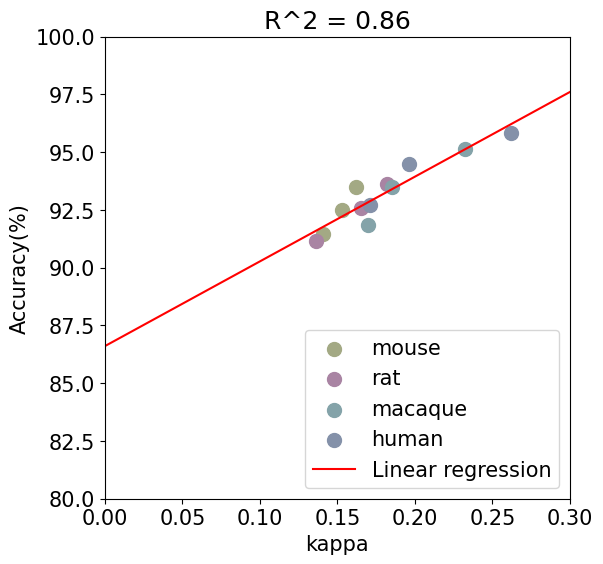

In [79]:
x_values = np.concatenate([mouse_mean_ei_kappa, rat_mean_ei_kappa, macaque_mean_ei_kappa, human_mean_ei_kappa])
y_values = np.concatenate([mouse_acc_pas, rat_acc_pas, macaque_acc_pas, human_acc_pas])

# Perform linear regression
coeffs = np.polyfit(x_values, y_values, 1)
line = np.poly1d(coeffs)

# Calculate the correlation coefficient and square it to get R^2
r = np.corrcoef(x_values, y_values)[0, 1]
r_squared = r**2

# Generate x values for the line
x_line = np.linspace(0, 1000, 100)

# Plot the scatter plot and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(mouse_mean_ei_kappa, mouse_acc_pas, s=100, alpha=1, color='#a3a984', label='mouse')
plt.scatter(rat_mean_ei_kappa, rat_acc_pas, s=100, alpha=1, color='#a984a3', label='rat')
plt.scatter(macaque_mean_ei_kappa, macaque_acc_pas, s=100, alpha=1, color='#84A3A9', label='macaque')
plt.scatter(human_mean_ei_kappa, human_acc_pas, s=100, alpha=1, color='#8491a9', label='human')
plt.plot(x_line, line(x_line), color='red', label='Linear regression')
plt.xlim(0, 0.3)
plt.ylim(80, 100)
plt.xlabel('kappa')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title(f'R^2 = {r_squared:.2f}')
plt.savefig('figure/pc_kappa_acc.png', dpi=800, bbox_inches='tight')
plt.show()

In [70]:
mouse_acc_act = [93.3, 94.5, 95.8]
rat_acc_act = [93.4, 94.8, 95.9]
macaque_acc_act = [93.97, 95, 95.89]
human_acc_act = [94.72, 95.8, 96.9]
mouse_pc_l = [316, 401, 481]
rat_pc_l = [535, 679, 701]
macaque_pc_l = [860, 874, 960]
human_pc_l = [1340, 1400, 1531]

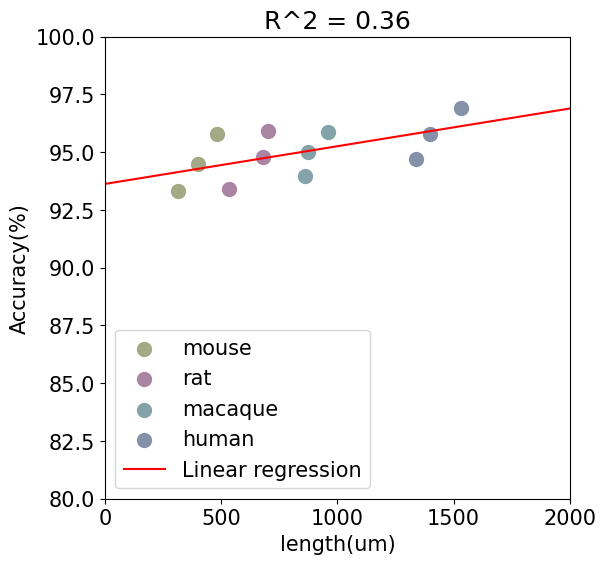

In [71]:
x_values = np.concatenate([mouse_pc_l, rat_pc_l, macaque_pc_l, human_pc_l])
y_values = np.concatenate([mouse_acc_act, rat_acc_act, macaque_acc_act, human_acc_act])

# Perform linear regression
coeffs = np.polyfit(x_values, y_values, 1)
line = np.poly1d(coeffs)

# Calculate the correlation coefficient and square it to get R^2
r = np.corrcoef(x_values, y_values)[0, 1]
r_squared = r**2

# Generate x values for the line
x_line = np.linspace(0, 2000, 100)

# Plot the scatter plot and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(mouse_pc_l, mouse_acc_act, s=100, alpha=1, color='#a3a984', label='mouse')
plt.scatter(rat_pc_l, rat_acc_act, s=100, alpha=1, color='#a984a3', label='rat')
plt.scatter(macaque_pc_l, macaque_acc_act, s=100, alpha=1, color='#84A3A9', label='macaque')
plt.scatter(human_pc_l, human_acc_act, s=100, alpha=1, color='#8491a9', label='human')
plt.plot(x_line, line(x_line), color='red', label='Linear regression')
plt.xlim(0, 2000)
plt.ylim(80, 100)
plt.xlabel('length(um)')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title(f'R^2 = {r_squared:.2f}')
plt.savefig('figure/pc_length_acc_act.png', dpi=800, bbox_inches='tight')
plt.show()

In [80]:
mouse_acc_act = [93.3, 94.5, 95.8]
rat_acc_act = [93.4, 94.8, 95.9]
macaque_acc_act = [93.97, 95, 95.89]
human_acc_act = [94.72, 95.8, 96.9]

mouse_mean_ei_kappa = [0.241, 0.303, 0.332]
rat_mean_ei_kappa = [0.256, 0.29, 0.302]
macaque_mean_ei_kappa = [0.27, 0.33, 0.354]
human_mean_ei_kappa = [0.35, 0.36, 0.402]

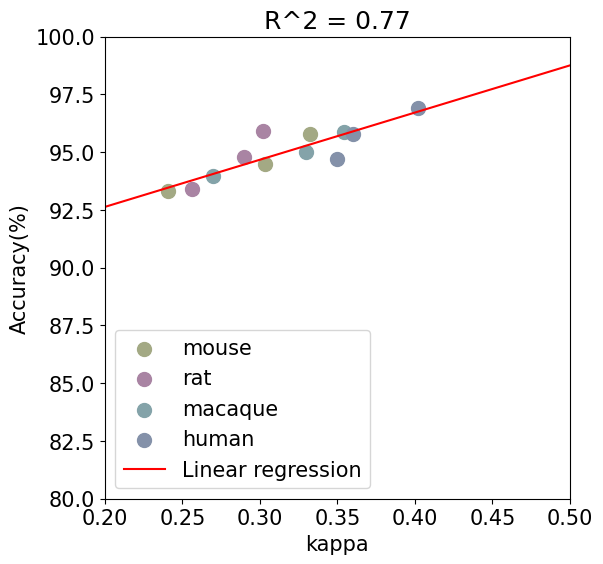

In [83]:
x_values = np.concatenate([mouse_mean_ei_kappa, rat_mean_ei_kappa, macaque_mean_ei_kappa, human_mean_ei_kappa])
y_values = np.concatenate([mouse_acc_act, rat_acc_act, macaque_acc_act, human_acc_act])

# Perform linear regression
coeffs = np.polyfit(x_values, y_values, 1)
line = np.poly1d(coeffs)

# Calculate the correlation coefficient and square it to get R^2
r = np.corrcoef(x_values, y_values)[0, 1]
r_squared = r**2

# Generate x values for the line
x_line = np.linspace(0, 1000, 100)

# Plot the scatter plot and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(mouse_mean_ei_kappa, mouse_acc_act, s=100, alpha=1, color='#a3a984', label='mouse')
plt.scatter(rat_mean_ei_kappa, rat_acc_act, s=100, alpha=1, color='#a984a3', label='rat')
plt.scatter(macaque_mean_ei_kappa, macaque_acc_act, s=100, alpha=1, color='#84A3A9', label='macaque')
plt.scatter(human_mean_ei_kappa, human_acc_act, s=100, alpha=1, color='#8491a9', label='human')
plt.plot(x_line, line(x_line), color='red', label='Linear regression')
plt.xlim(0.2, 0.5)
plt.ylim(80, 100)
plt.xlabel('kappa')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.title(f'R^2 = {r_squared:.2f}')
plt.savefig('figure/pc_kappa_acc_act.png', dpi=800, bbox_inches='tight')
plt.show()